In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [88]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
female = train_data.loc[train_data.Sex == 'female']['Survived']
rate_female = sum(female)/len(female)

print('% of women who survived:', rate_female)

male = train_data.loc[train_data.Sex == 'male']['Survived']
rate_male = sum(male)/len(male)

print('% of men who survived:', rate_male)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [90]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

y = train_data['Survived']

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

final_X_train = imputed_X_train
final_X_test = imputed_X_test

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(final_X_train,y)
predictions = model.predict(final_X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Pclass': test_data.Pclass, 
                       'Sex': test_data.Sex , 'Age': test_data.Age, 'SibSp': test_data.SibSp, 
                       'Parch': test_data.Parch  , 'Survived': predictions})
output.to_csv('predictions.csv', index=False)
print('Predictions completed')

Predictions completed


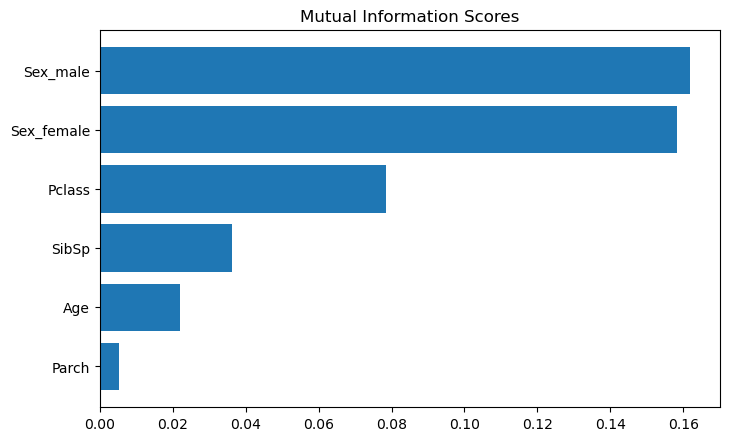

In [101]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(final_X_train, y)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

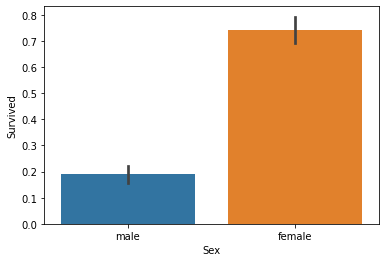

In [108]:
sns.barplot(x=train_data.Sex, y=train_data.Survived)

C:\Users\Paul\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

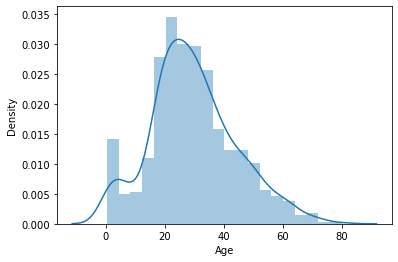

In [116]:
sns.distplot(a=train_data.Age, hist=True, kde=True)

In [92]:
predictions = pd.read_csv('predictions.csv')
predictions.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Survived
0,892,3,male,34.5,0,0,0
1,893,3,female,47.0,1,0,1
2,894,2,male,62.0,0,0,0
3,895,3,male,27.0,0,0,0
4,896,3,female,22.0,1,1,1


In [93]:
female_predictions = predictions.loc[predictions.Sex == 'female']['Survived']
rate_female = sum(female)/len(female)

print('% of women who survived:', rate_female)

male = predictions.loc[predictions.Sex == 'male']['Survived']
rate_male = sum(male)/len(male)

print('% of men who survived:', rate_male)

% of women who survived: 0.7420382165605095
% of men who survived: 0.03759398496240601


,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3.0,22.0,1.0,0.0,0.0,1.0
1,1.0,38.0,1.0,0.0,1.0,0.0
2,3.0,26.0,0.0,0.0,1.0,0.0
3,1.0,35.0,1.0,0.0,1.0,0.0
4,3.0,35.0,0.0,0.0,0.0,1.0
